<a href="https://colab.research.google.com/github/najla25naena/codsoft/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
df=pd.read_csv('/content/PHISHING.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [2]:
df.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [3]:
df.isna().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.drop(columns=[
    'length_url', 'length_host','url','nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'ratio_digits_url', 'ratio_digits_host', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'popup_window', 'safe_anchor', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'web_traffic', 'page_rank'
], axis=1, inplace=True, errors='ignore')

In [6]:
df.columns

Index(['length_hostname', 'ip', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'dns_record', 'google_index', 'status'],
      dtype='object')

In [7]:
df.dtypes

,0
length_hostname,int64
ip,int64
nb_www,int64
nb_com,int64
nb_dslash,int64
http_in_path,int64
https_token,int64
punycode,int64
port,int64
tld_in_path,int64


In [8]:
df['status'].unique()

array(['legitimate', 'phishing'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df.dtypes

,0
length_hostname,int64
ip,int64
nb_www,int64
nb_com,int64
nb_dslash,int64
http_in_path,int64
https_token,int64
punycode,int64
port,int64
tld_in_path,int64


In [10]:
df.columns

Index(['length_hostname', 'ip', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'dns_record', 'google_index', 'status'],
      dtype='object')

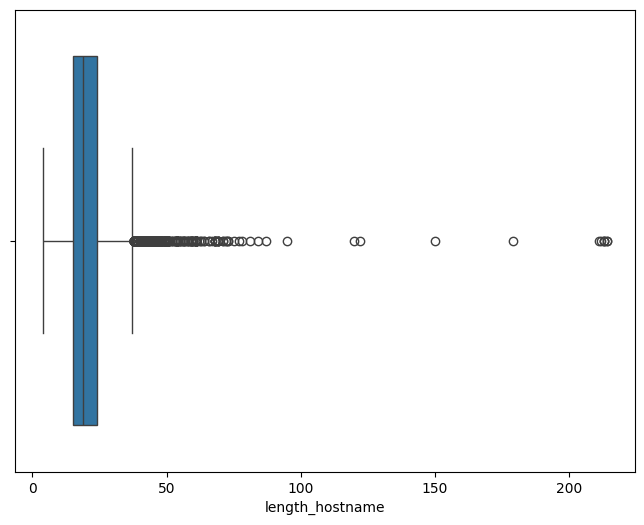

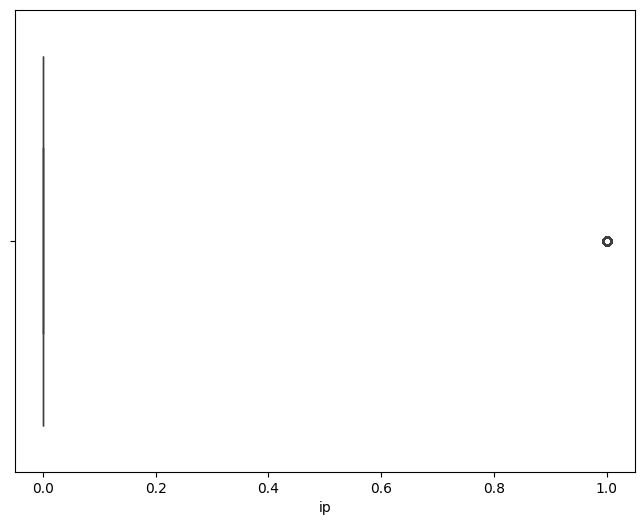

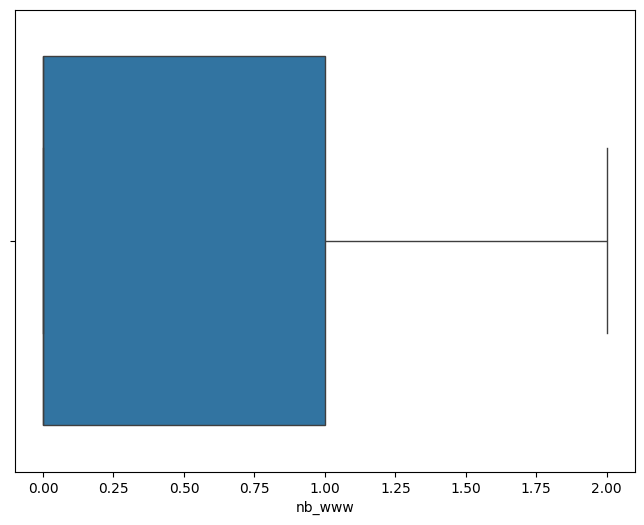

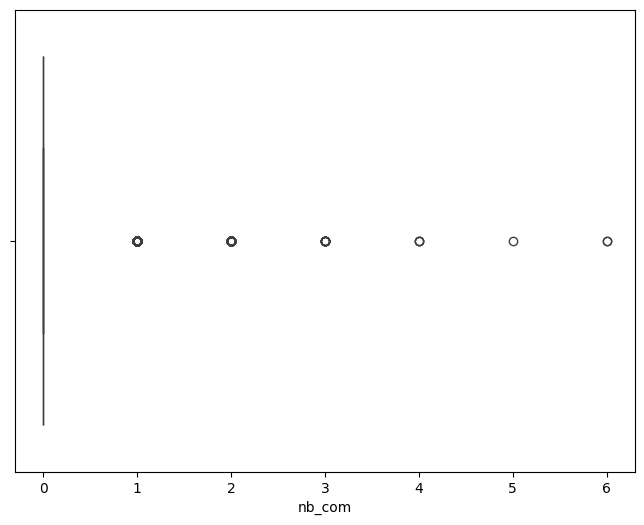

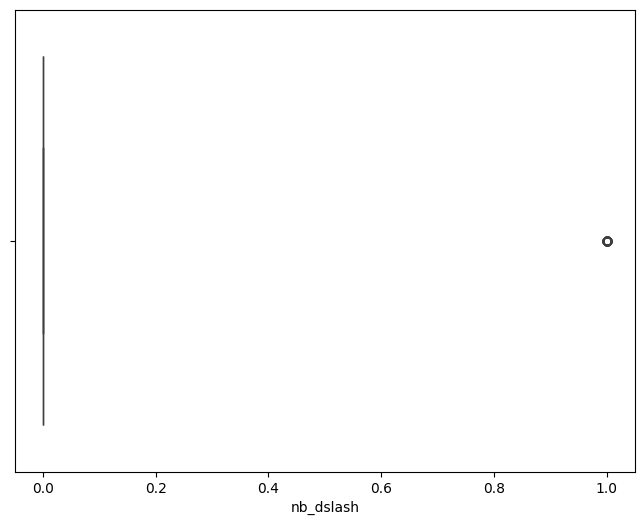

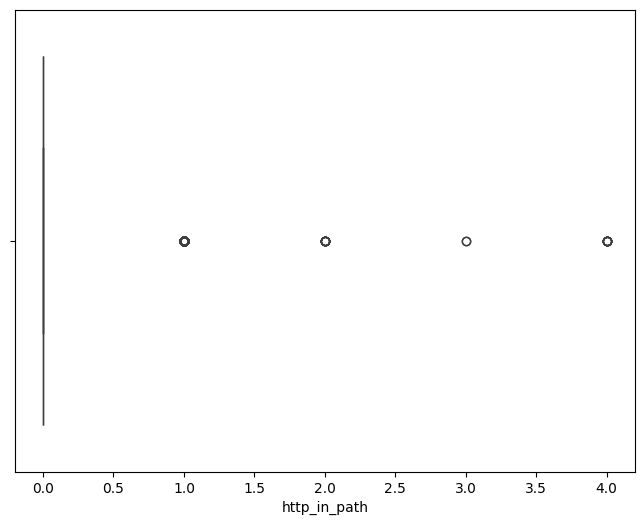

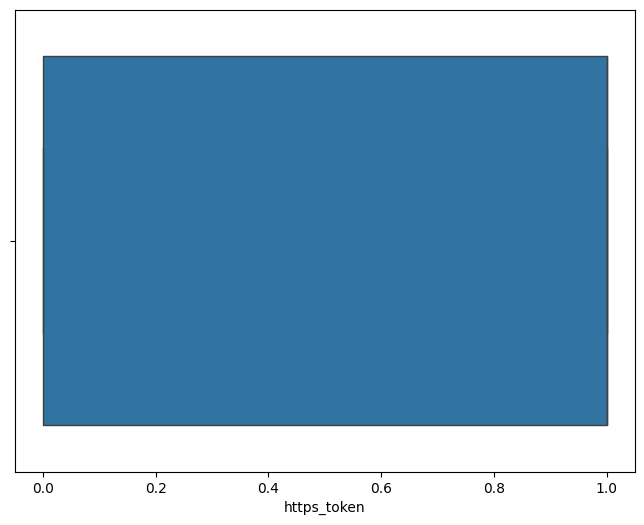

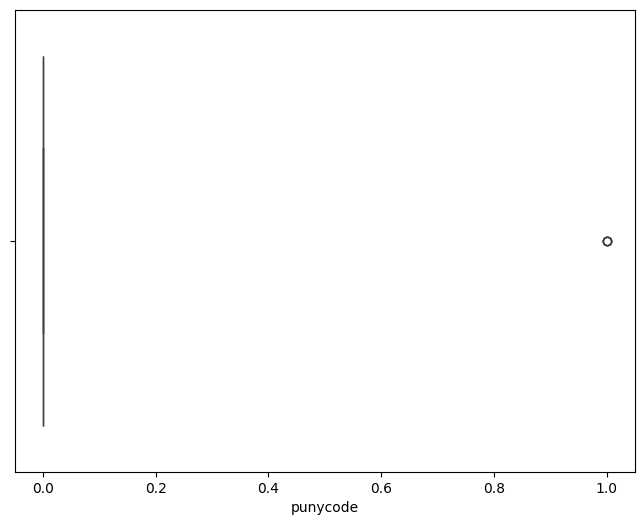

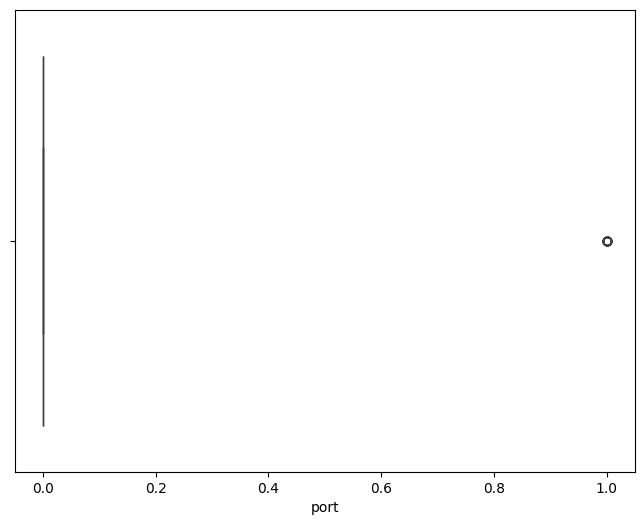

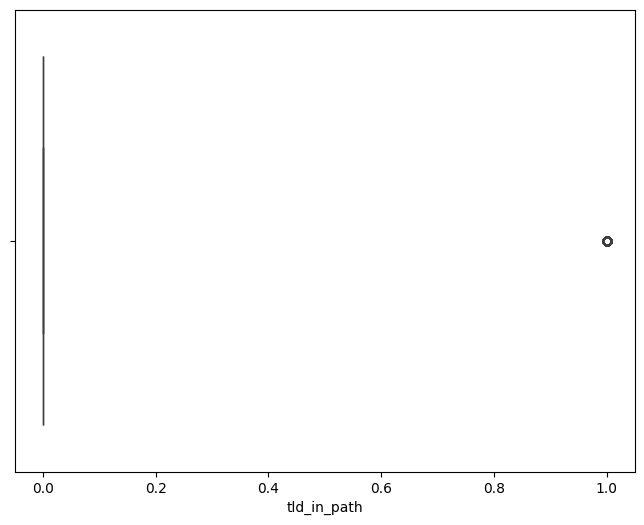

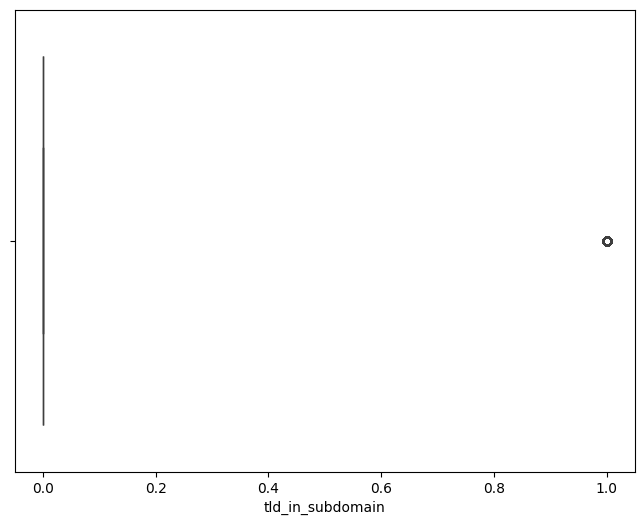

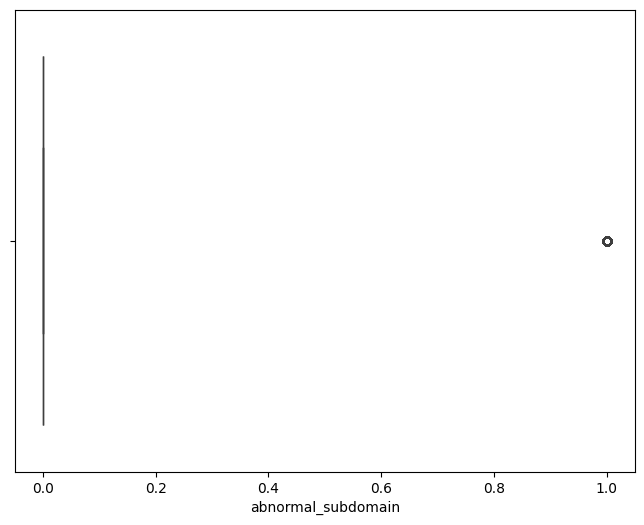

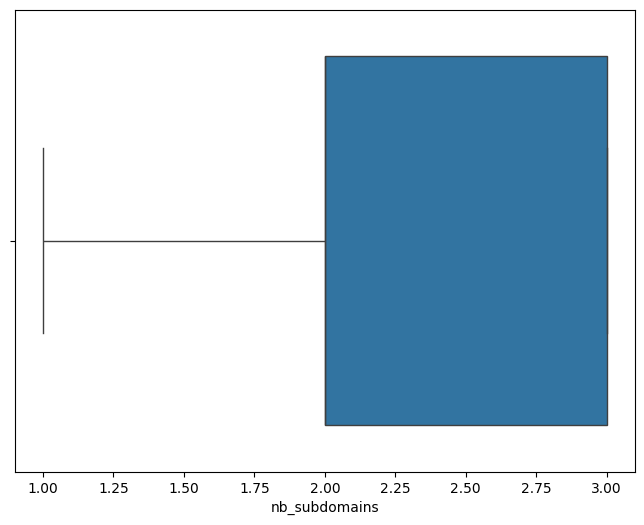

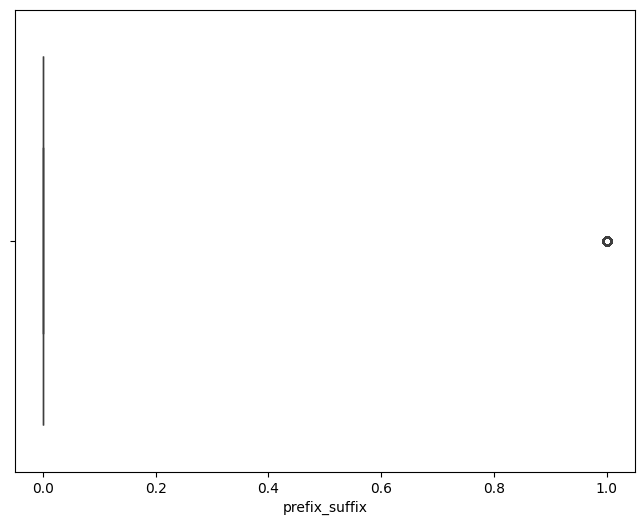

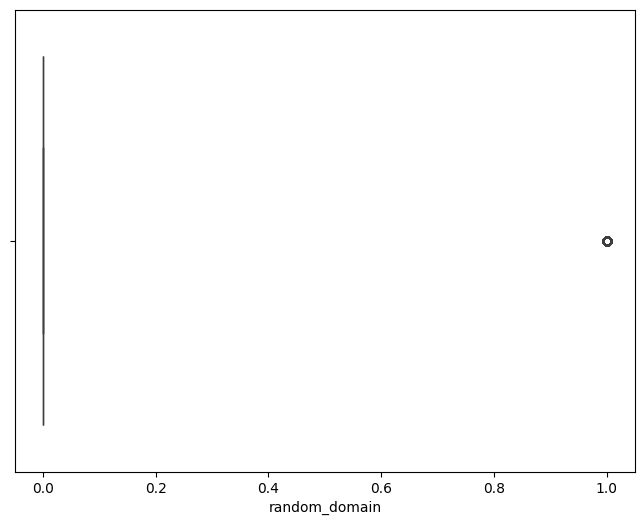

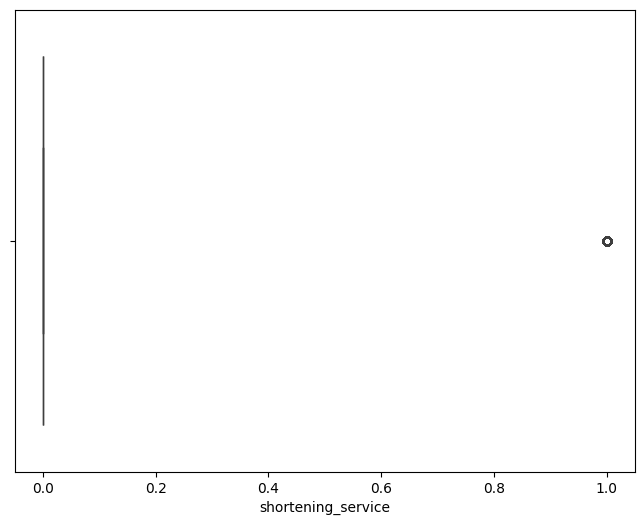

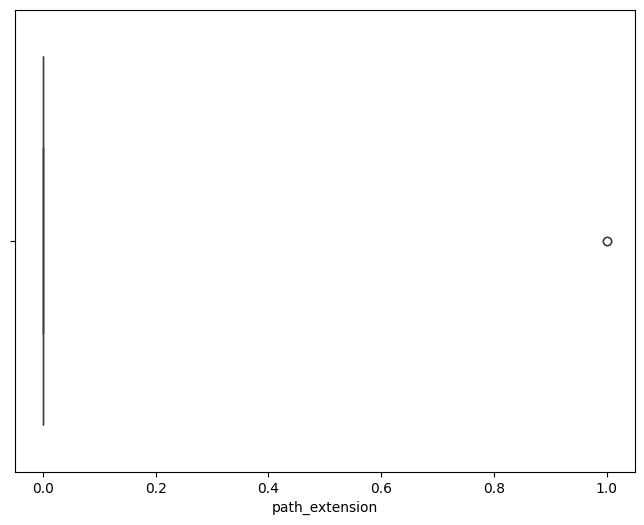

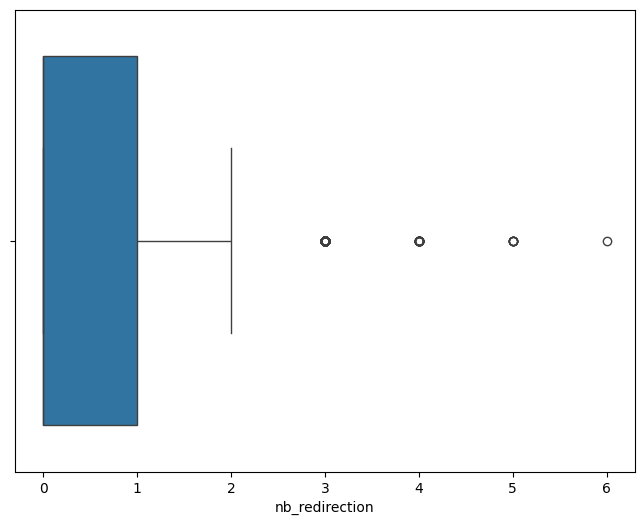

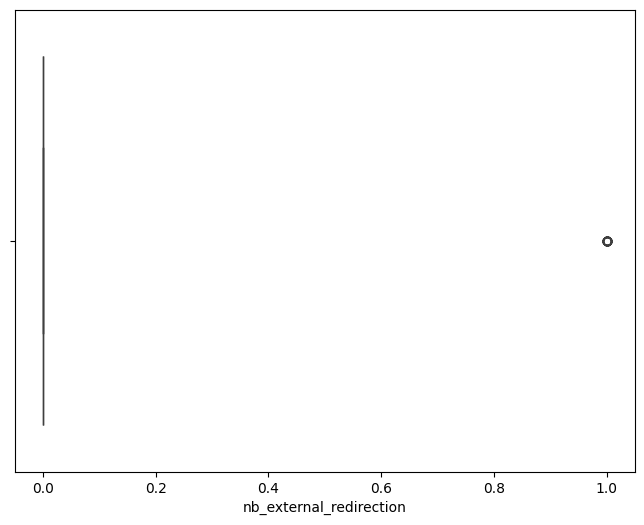

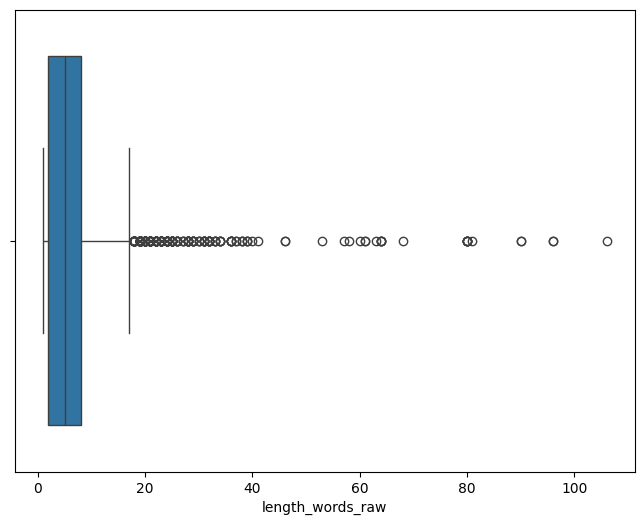

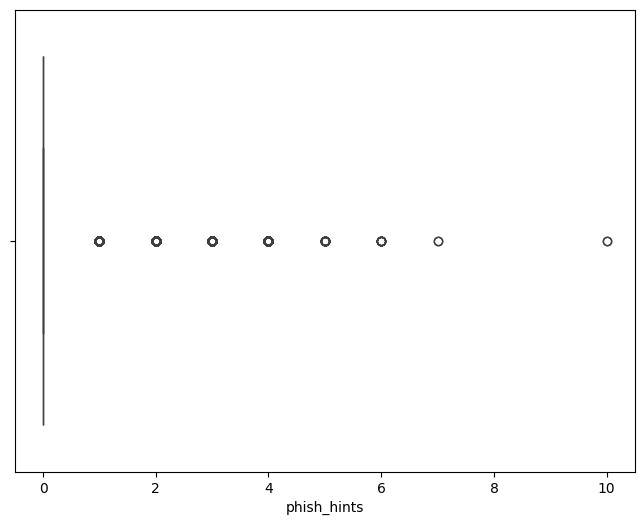

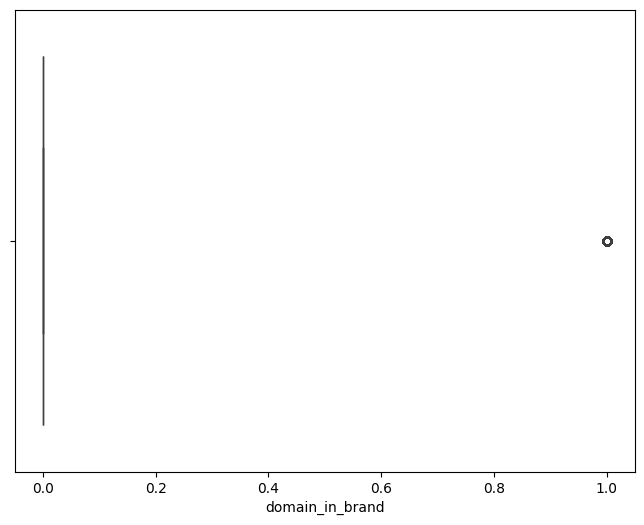

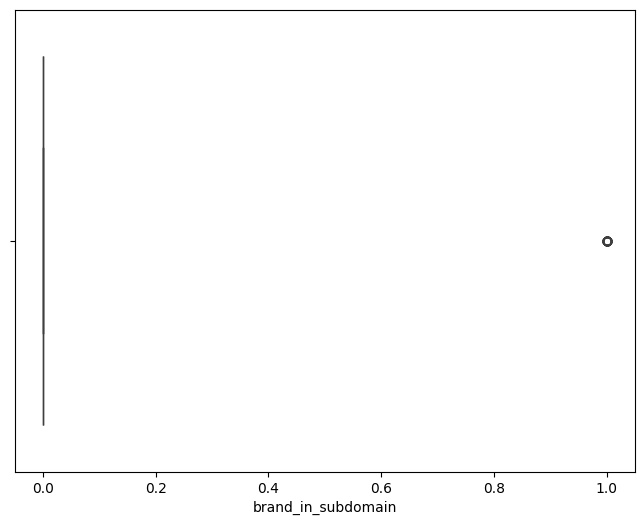

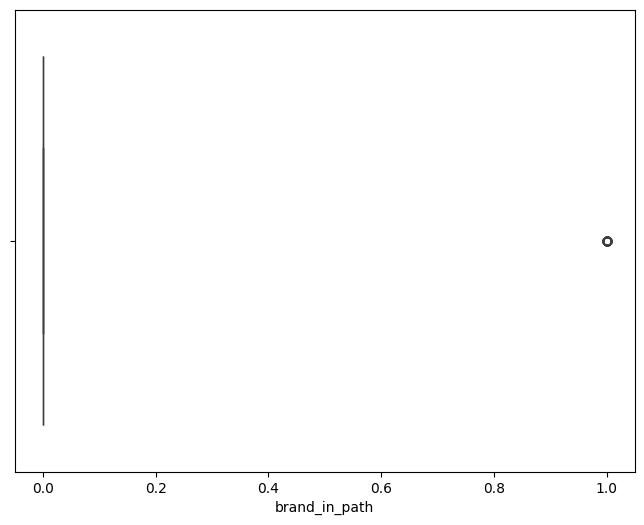

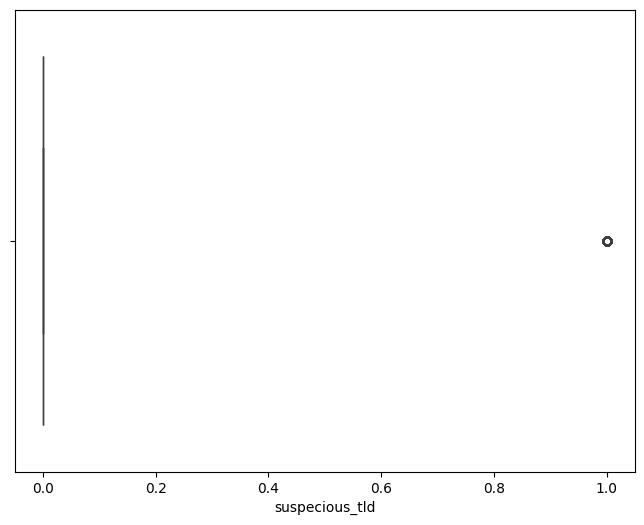

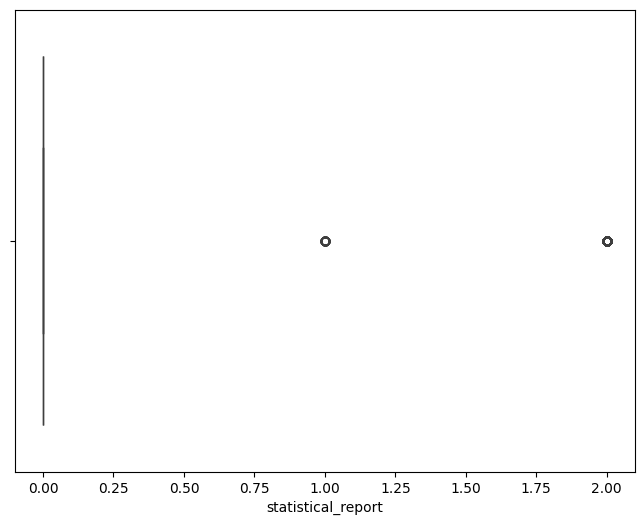

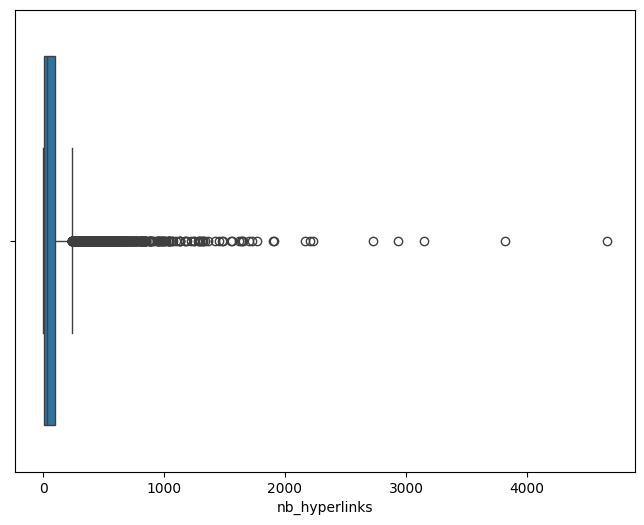

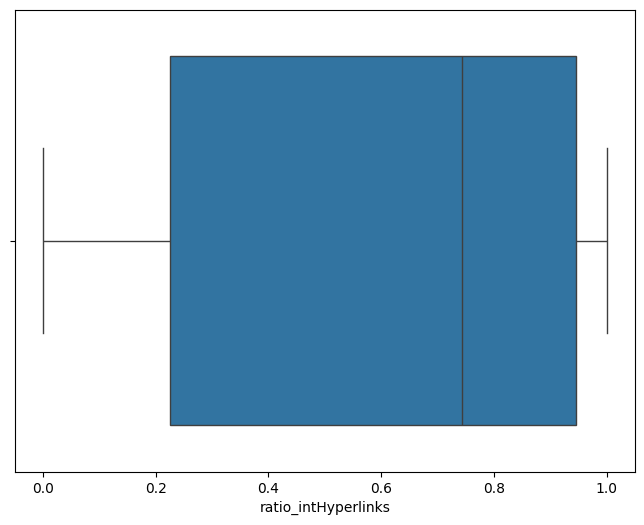

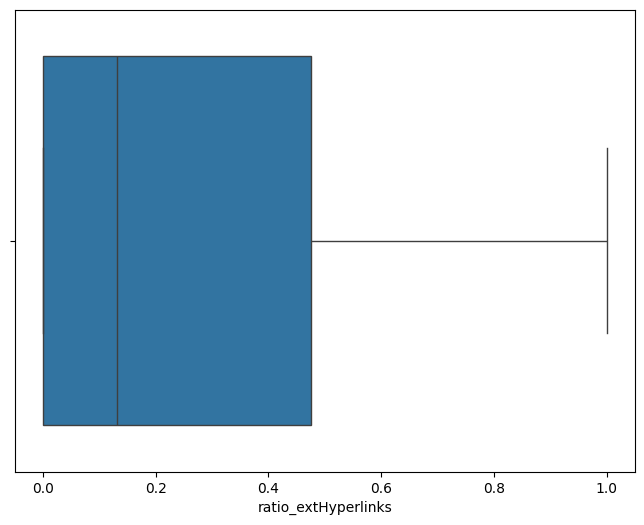

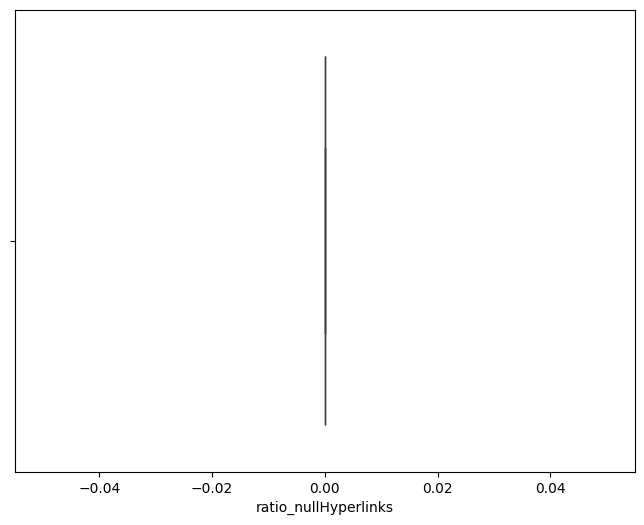

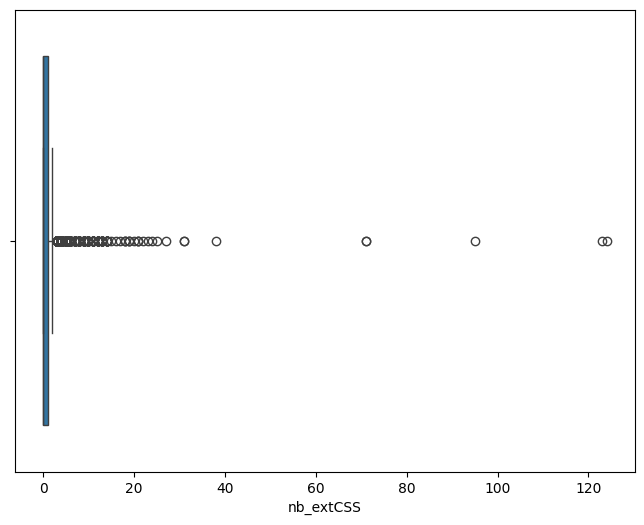

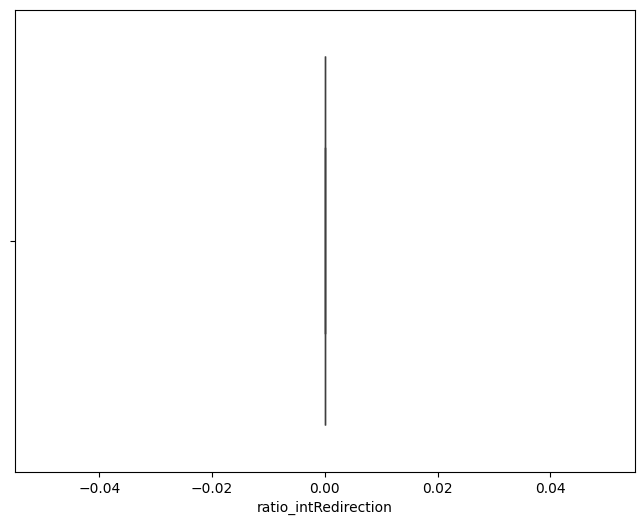

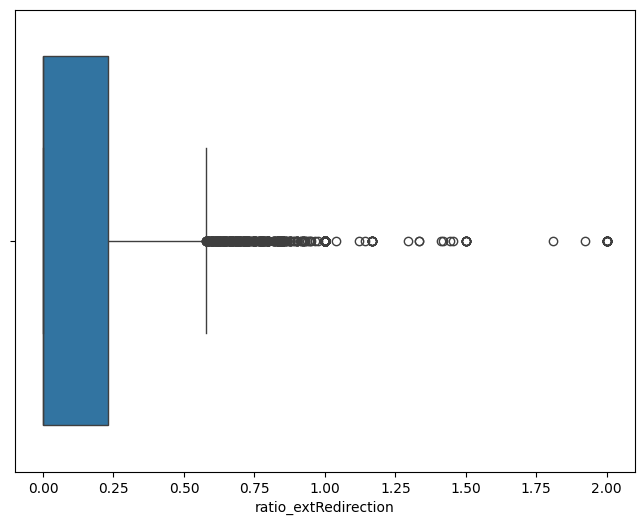

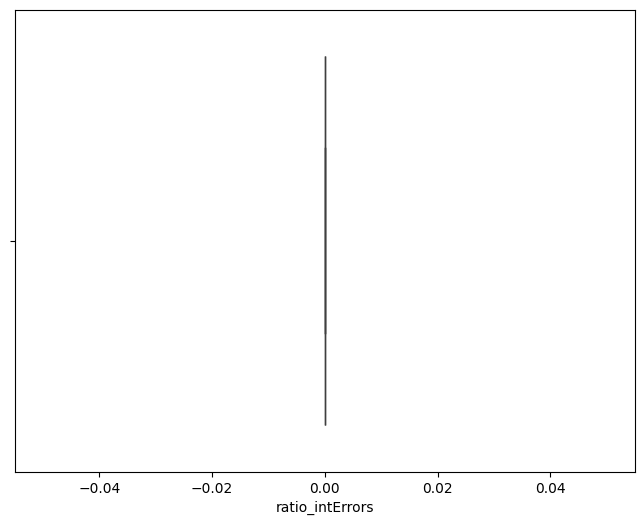

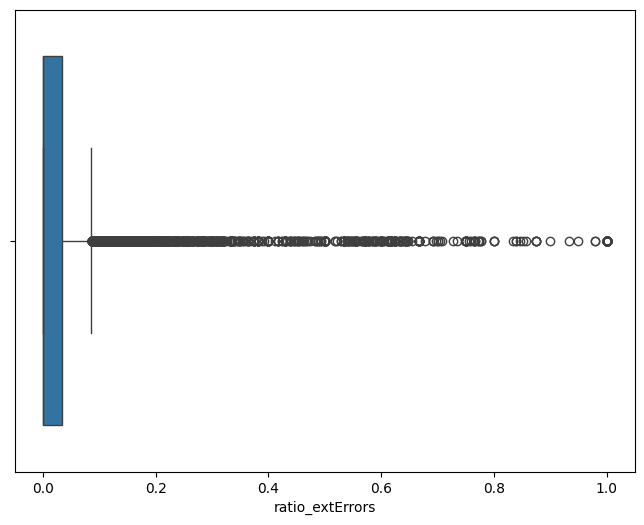

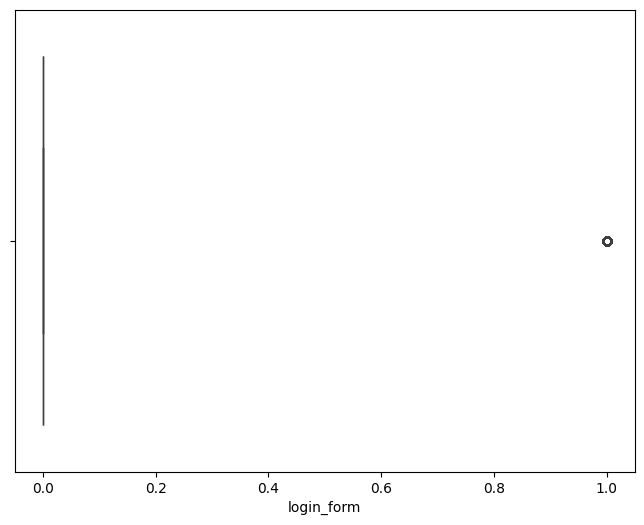

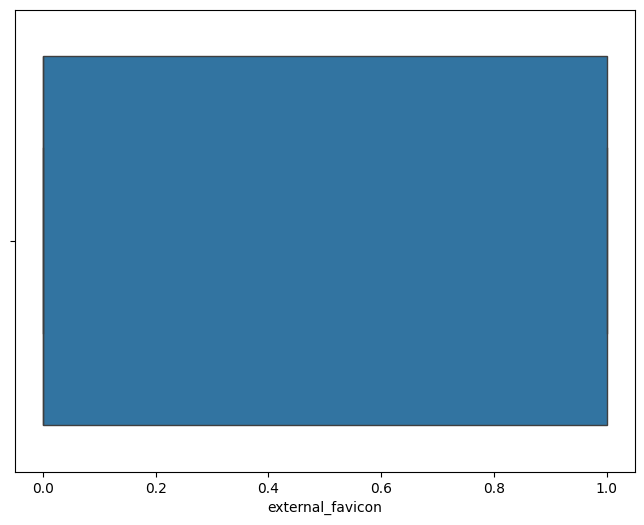

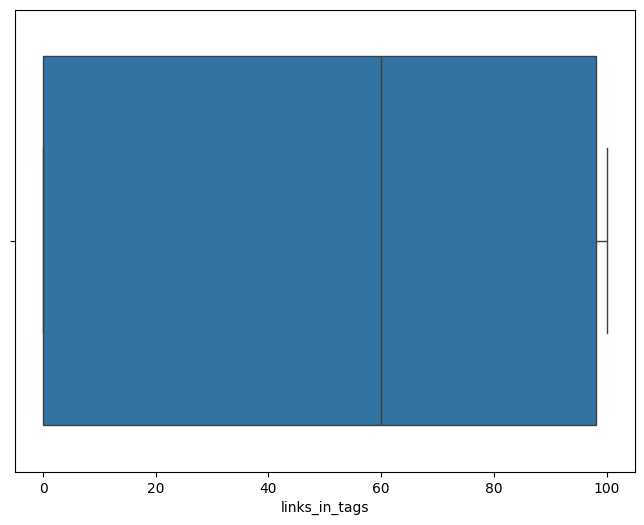

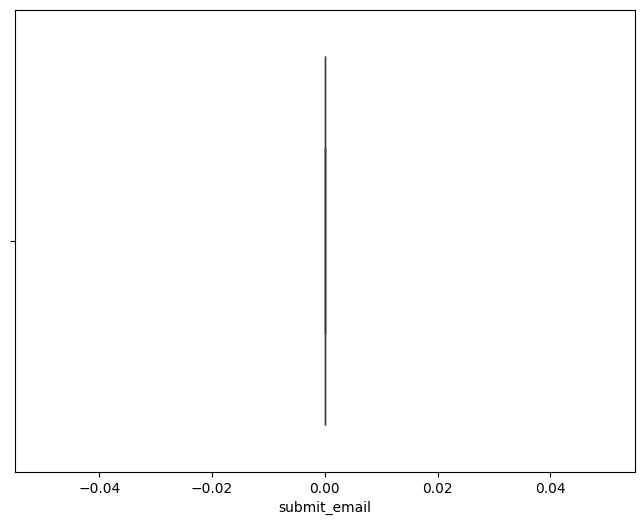

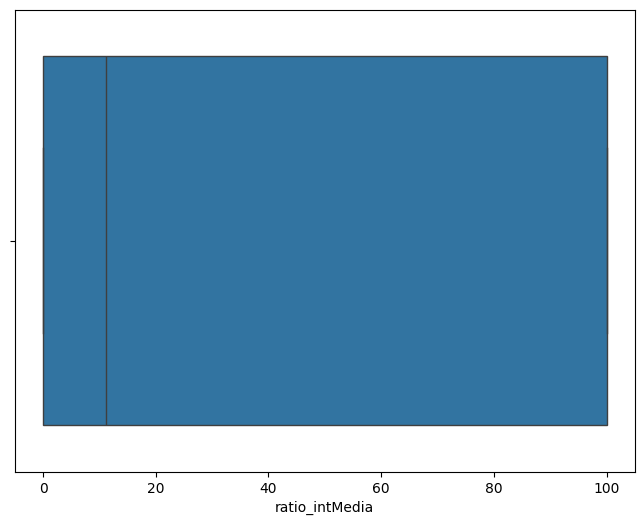

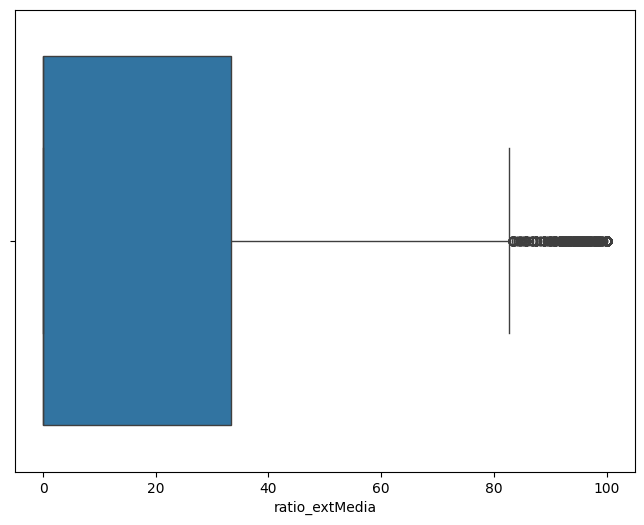

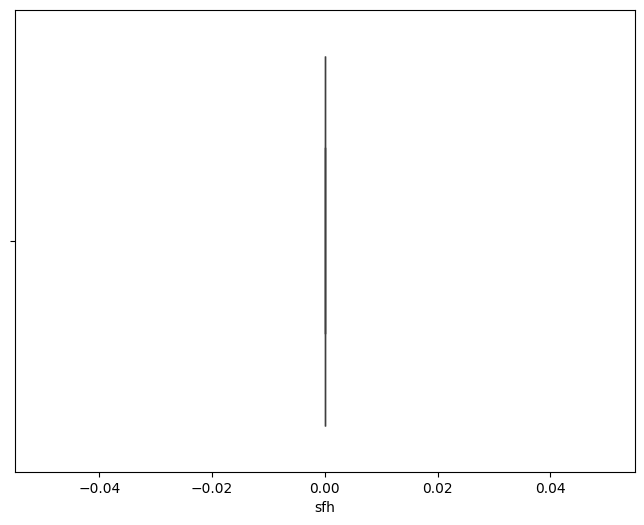

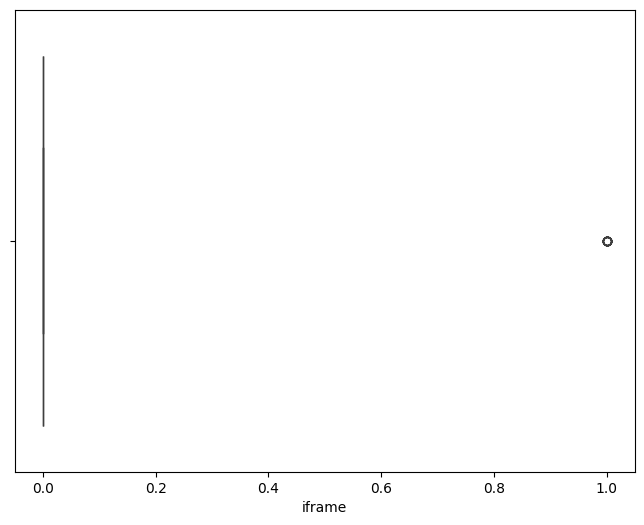

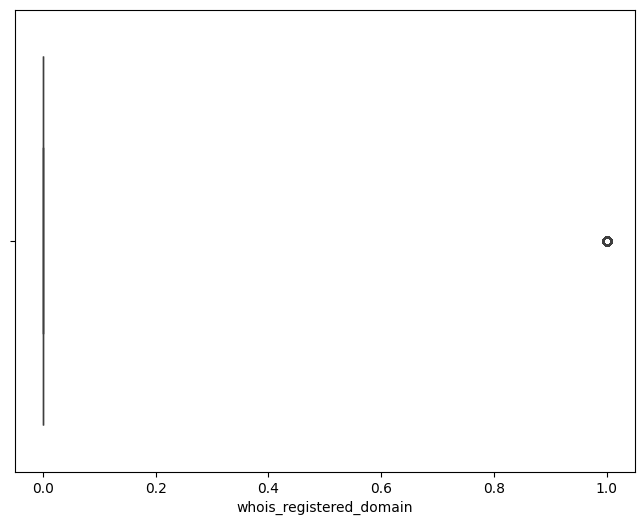

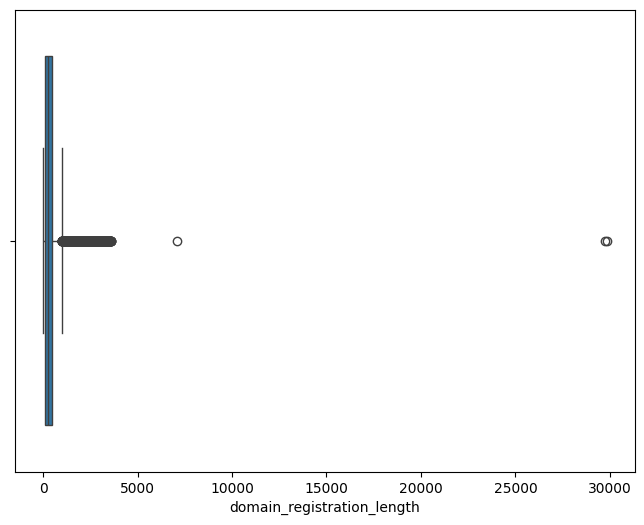

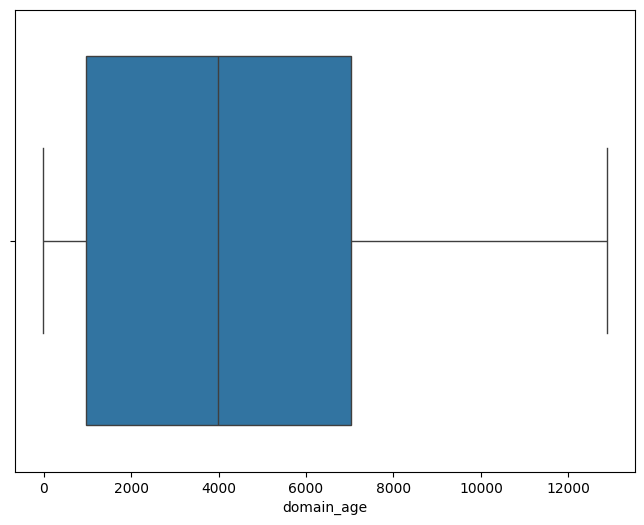

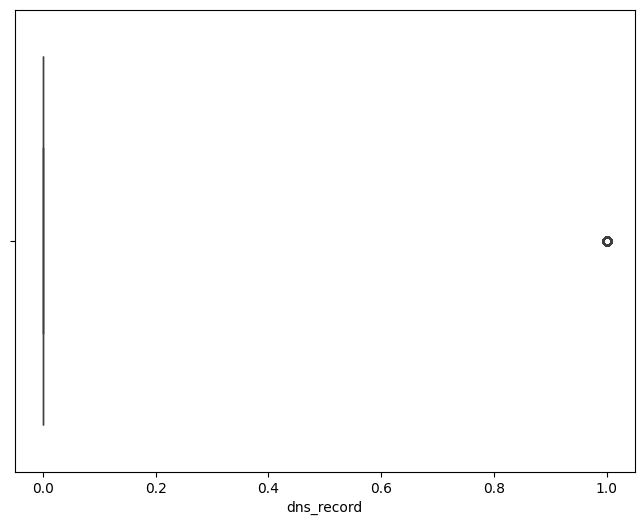

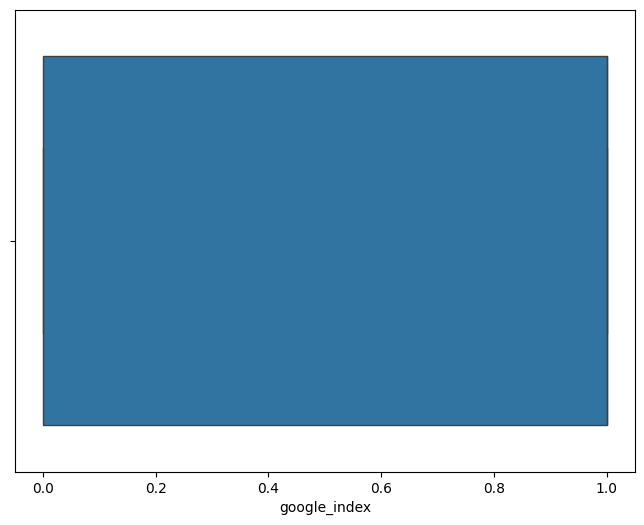

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
num_colums=['length_hostname', 'ip', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'dns_record', 'google_index']
for col in num_colums:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])
  plt.show()



## Definition:
An outlier is a data point that is significantly different or distant from the majority of the data. It doesn't follow the pattern or trend of the rest of the dataset.

# Causes:
Outliers can occur due to errors (e.g., measurement or data entry mistakes) or natural variation (e.g., extreme values in real-world data like very tall or short people).

# Impact:
Outliers can skew results, affect statistical calculations (e.g., mean and standard deviation), and lead to misleading interpretations if not handled properly.

In [12]:
columns_with_outliers =['length_hostname', 'ip', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'dns_record', 'google_index']
for col in columns_with_outliers:
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(lower_bound)
print(upper_bound)
print(f'After removing outliers, new shape: {len(df)}')

-1.5
2.5
After removing outliers, new shape: 1637


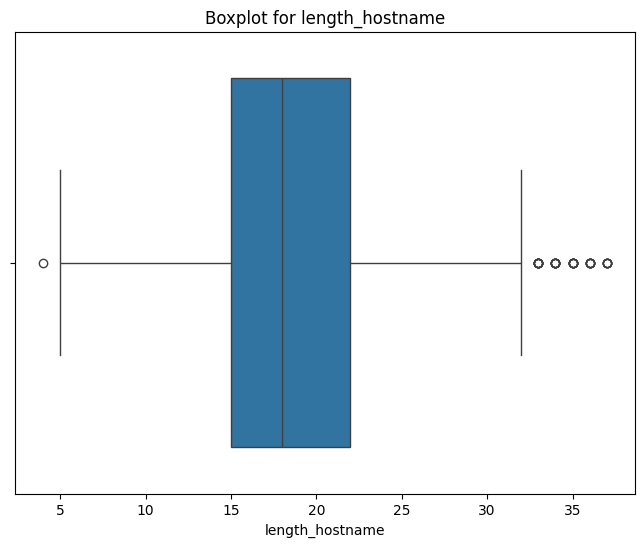

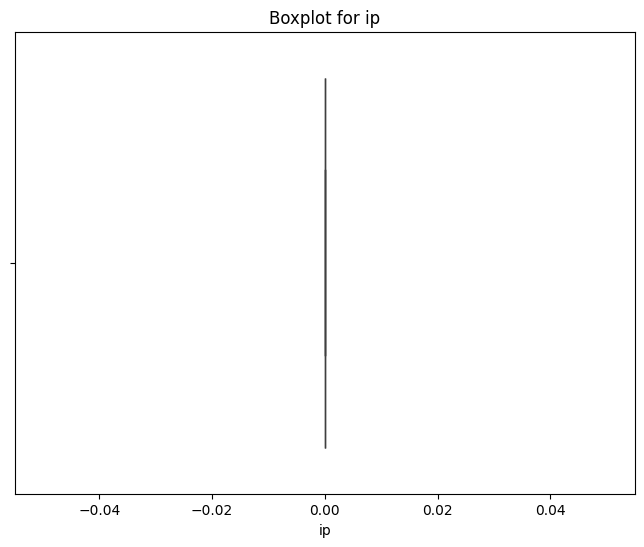

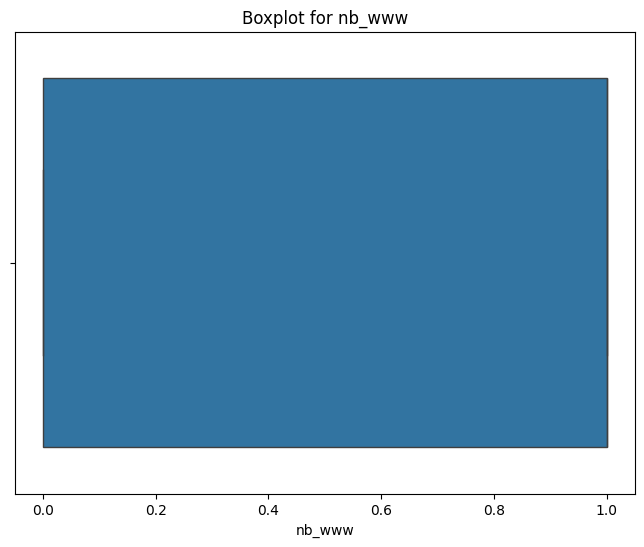

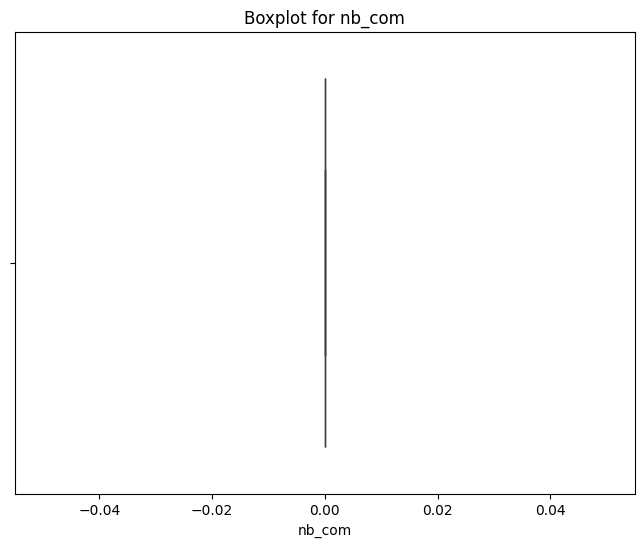

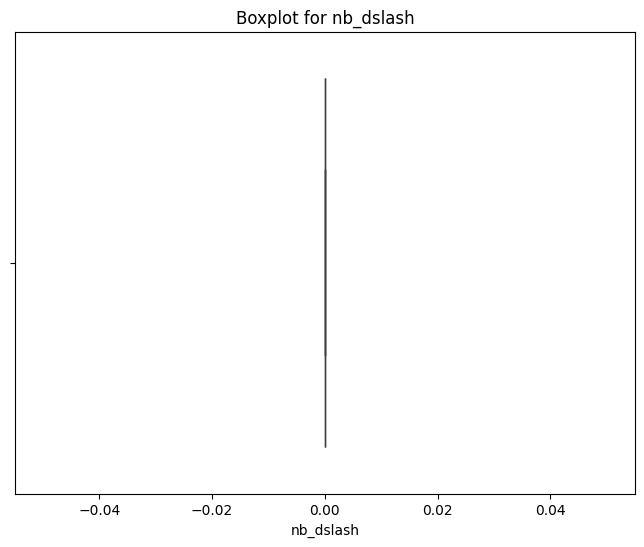

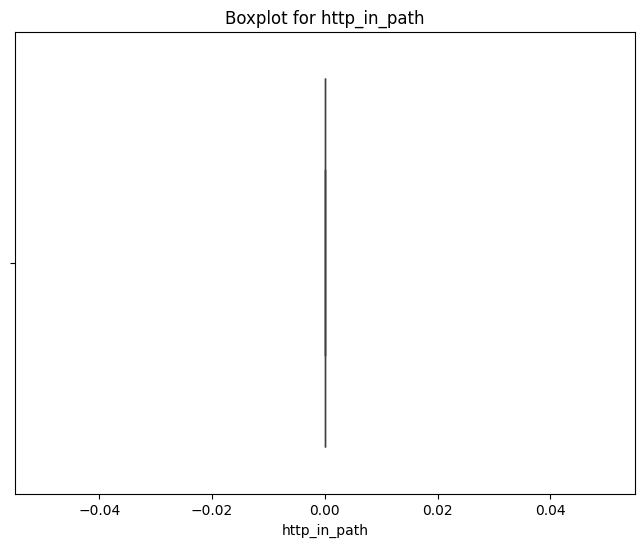

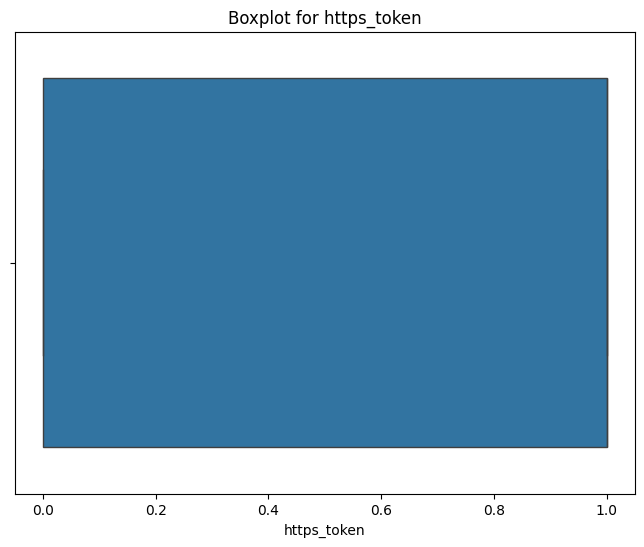

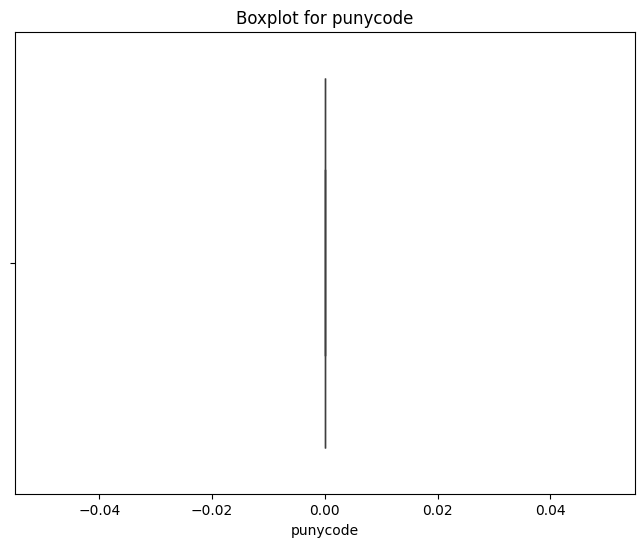

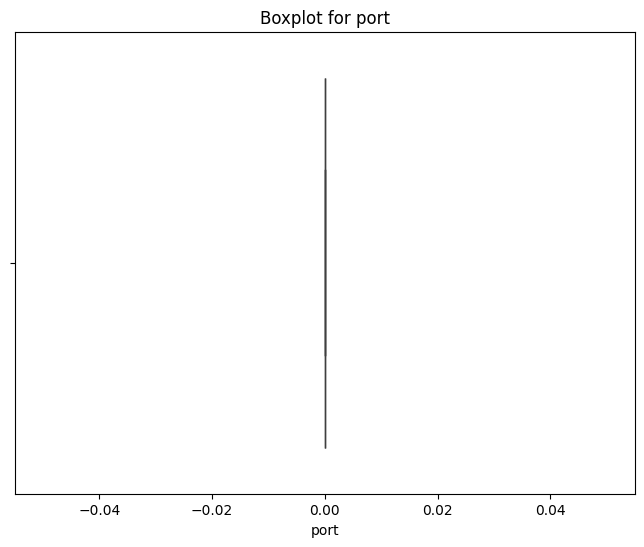

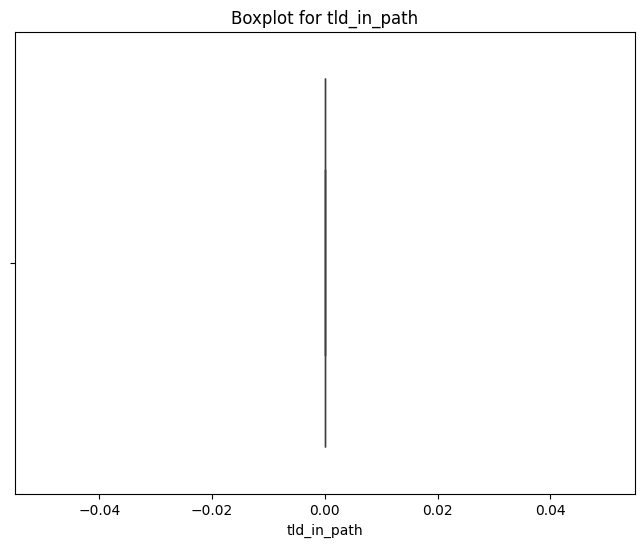

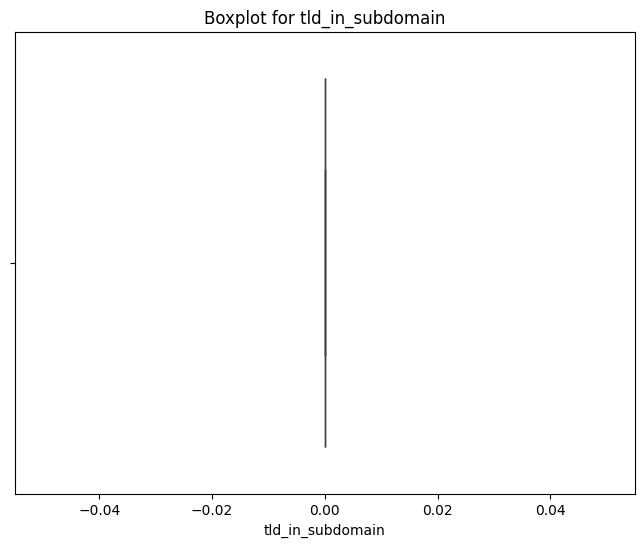

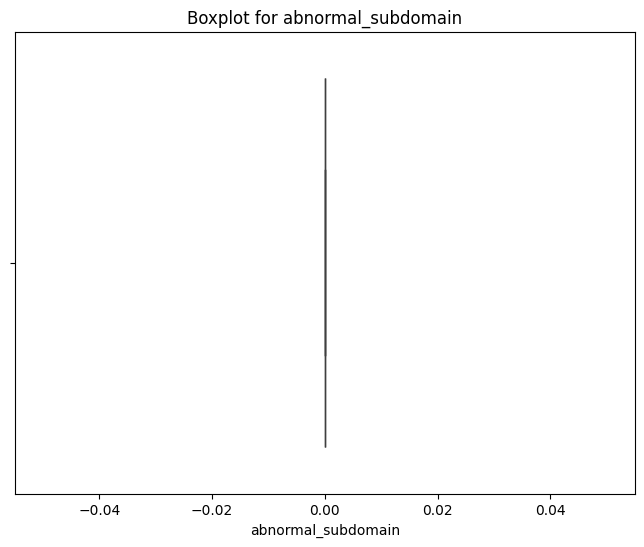

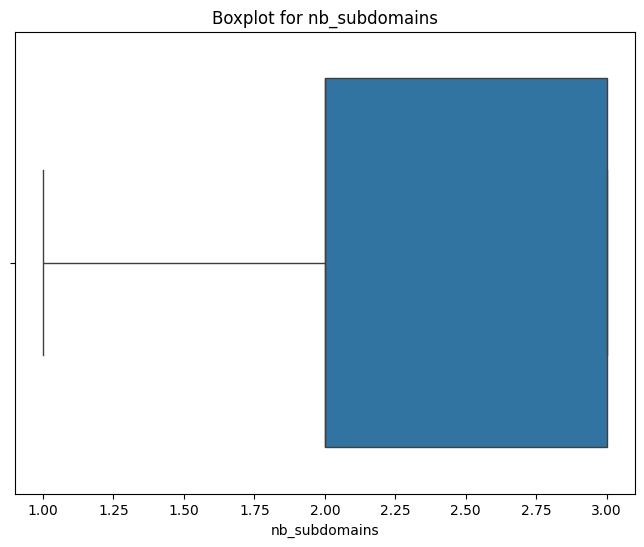

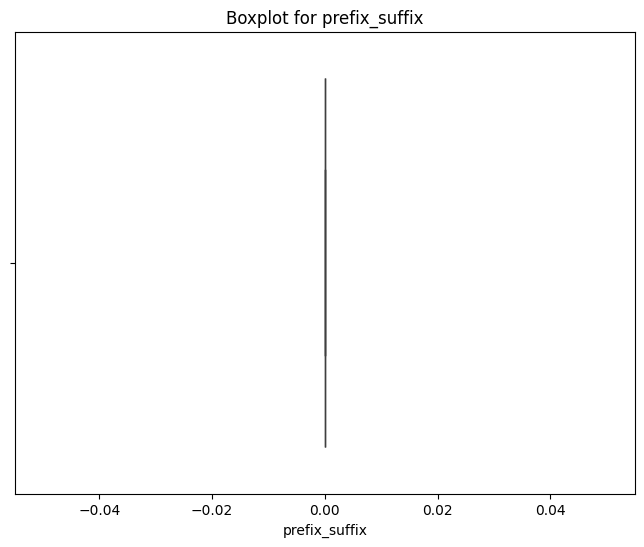

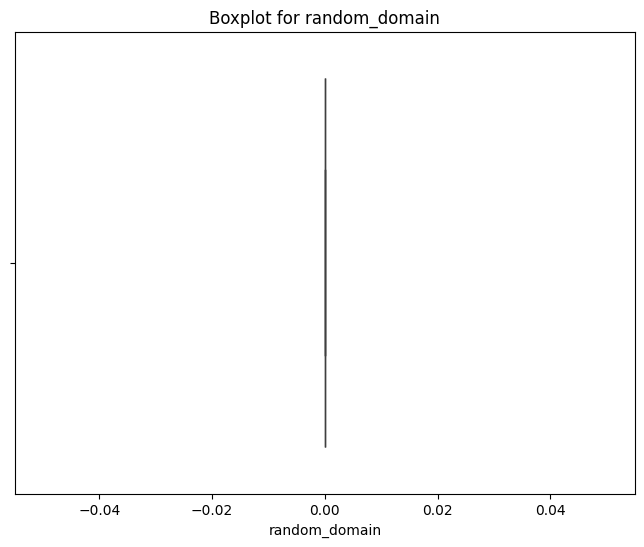

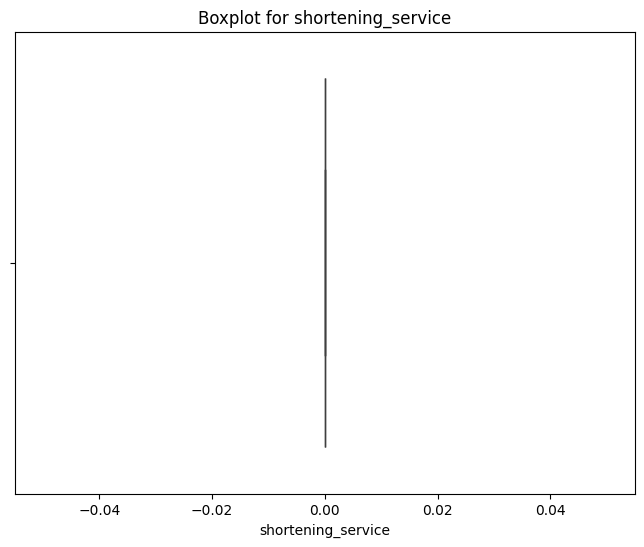

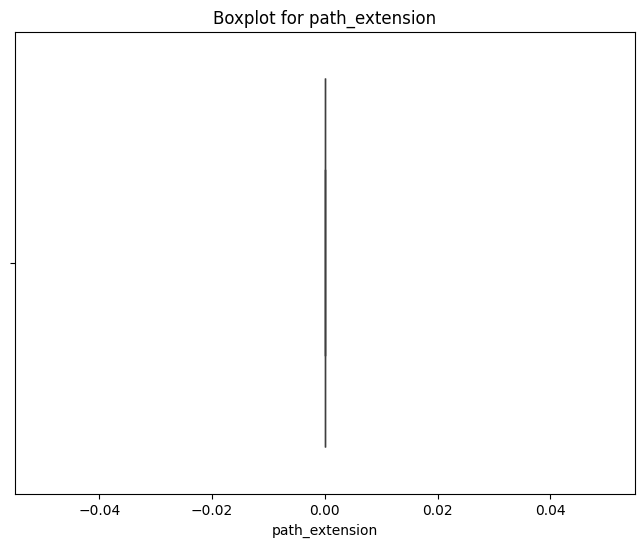

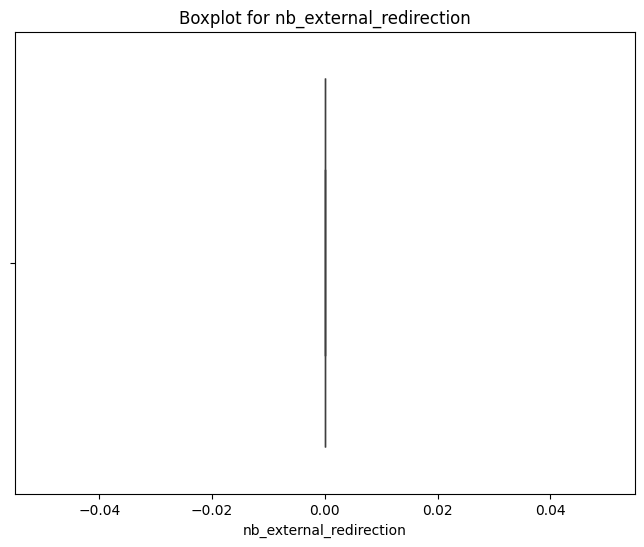

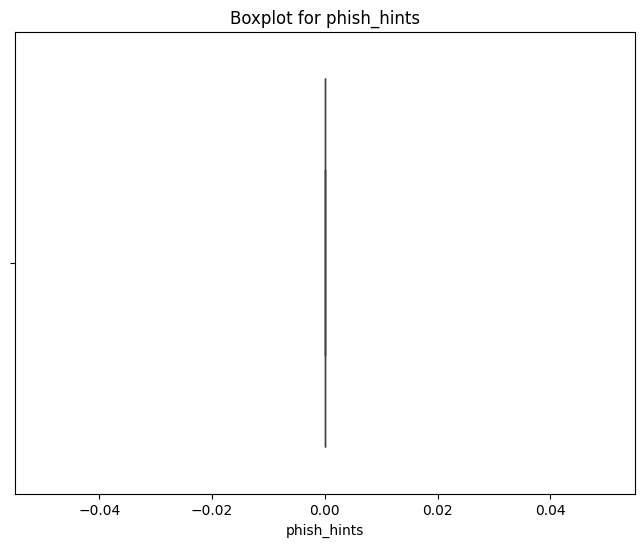

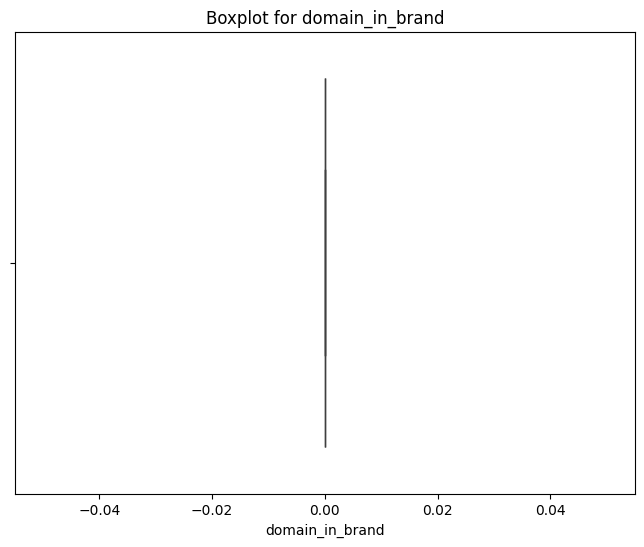

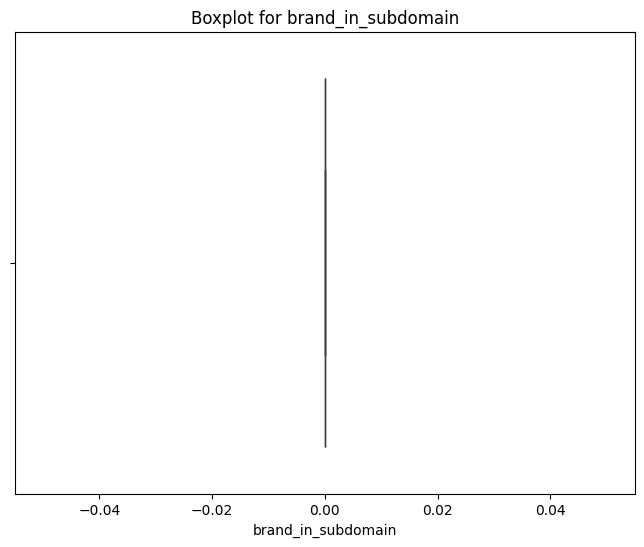

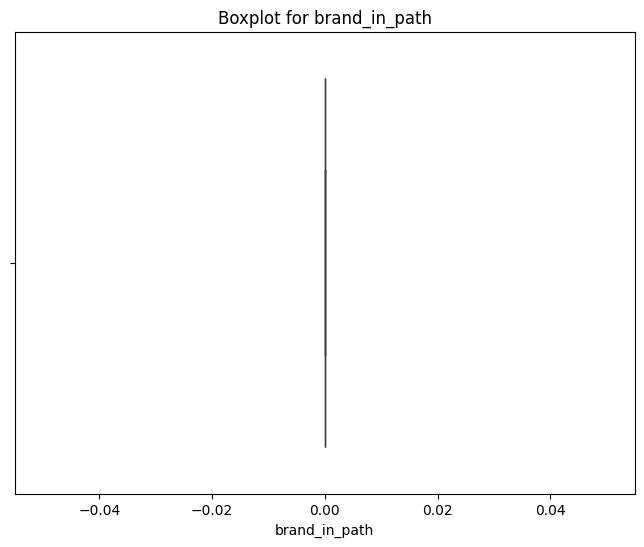

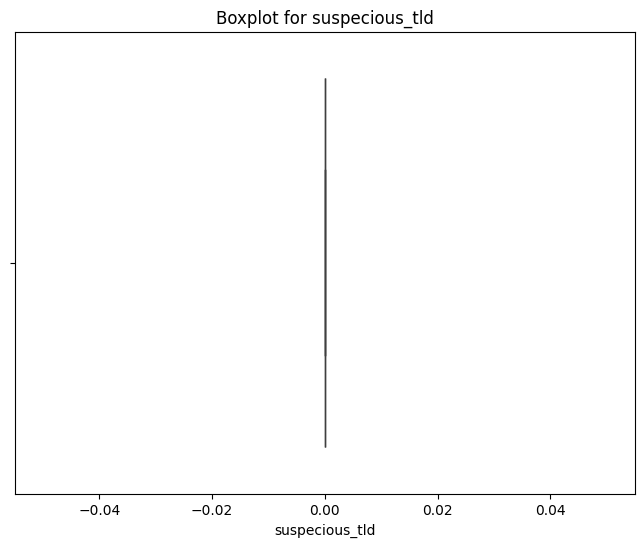

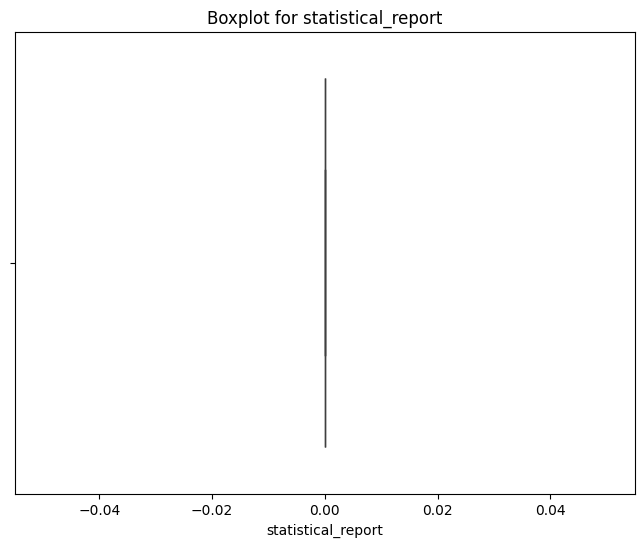

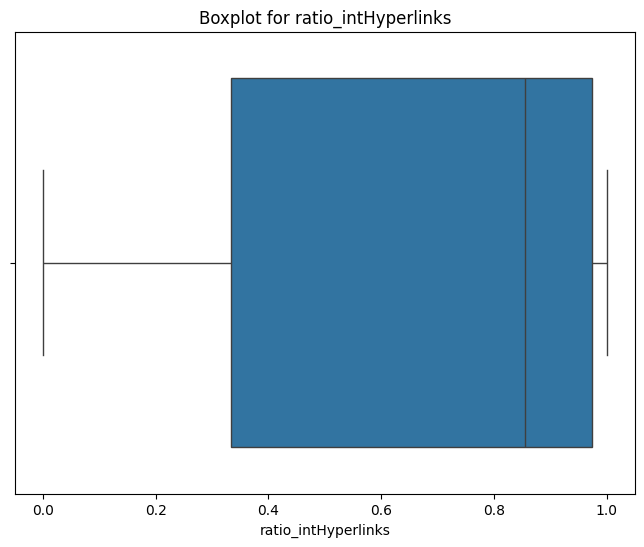

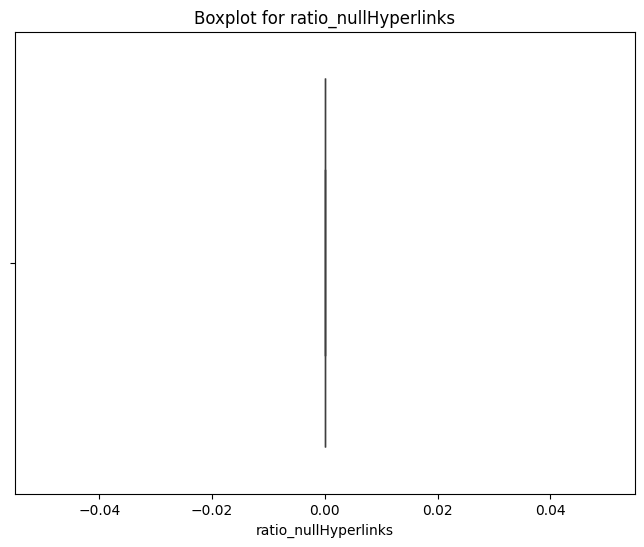

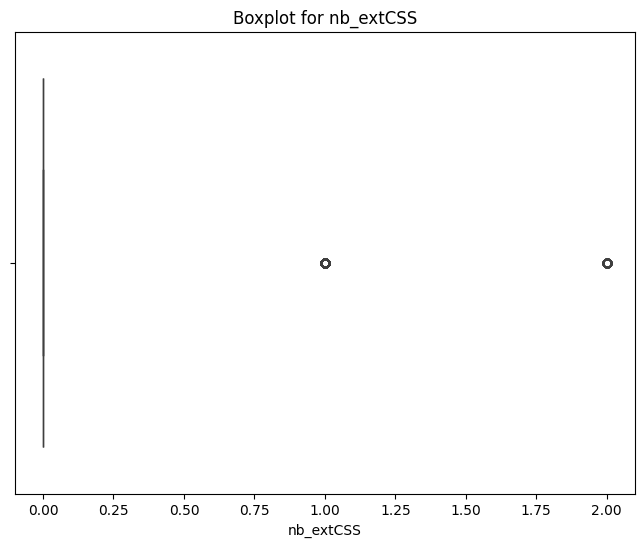

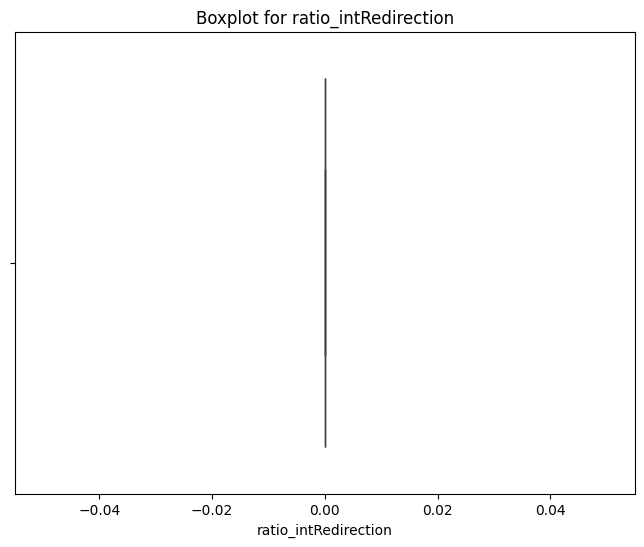

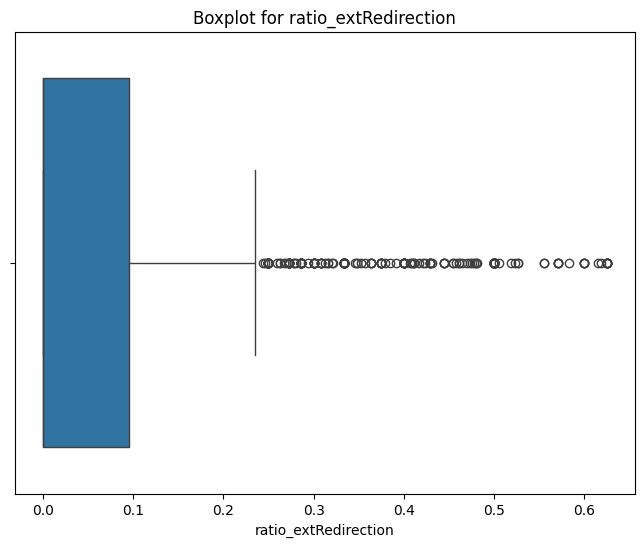

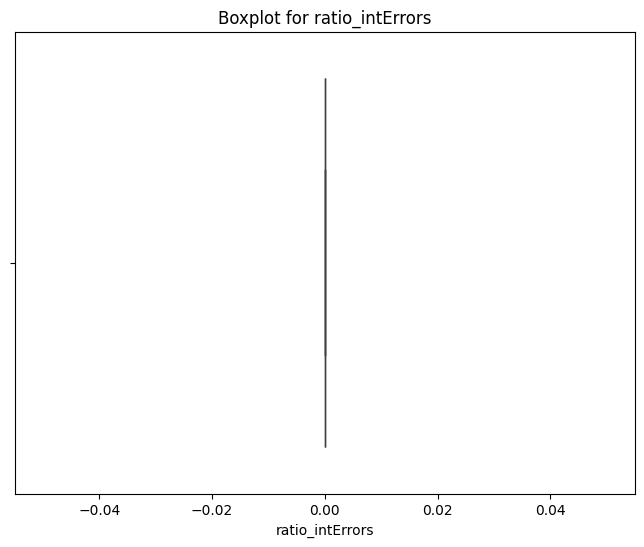

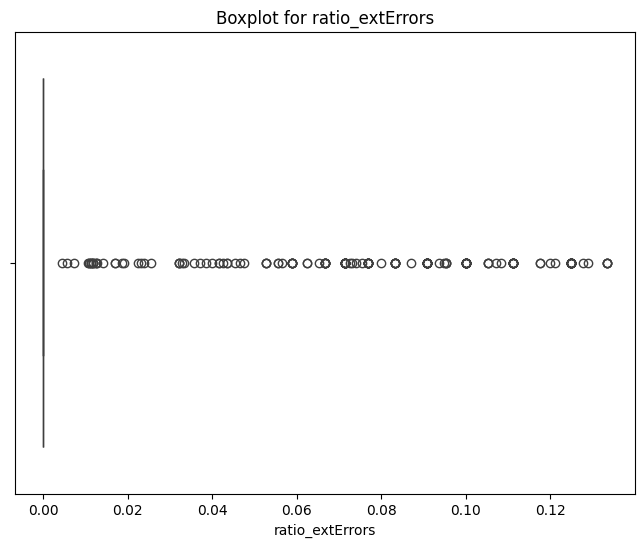

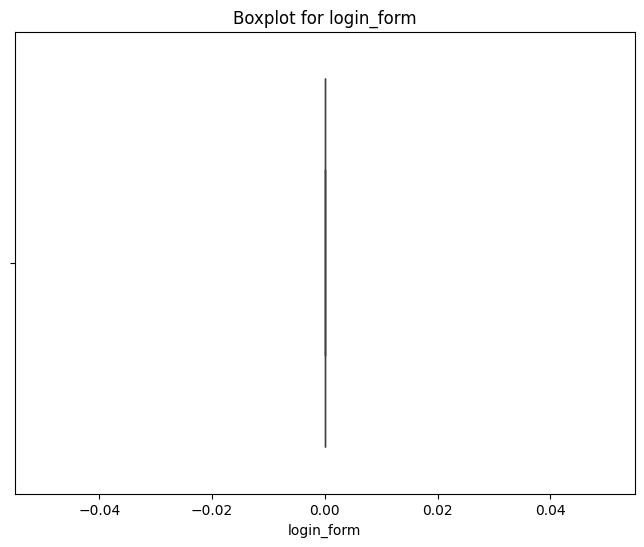

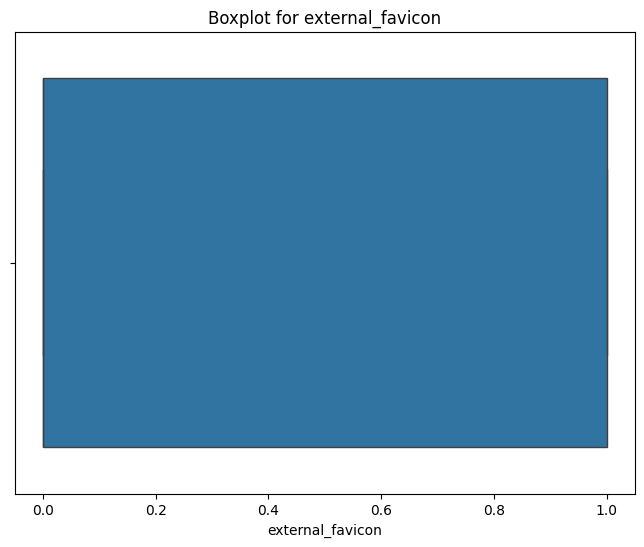

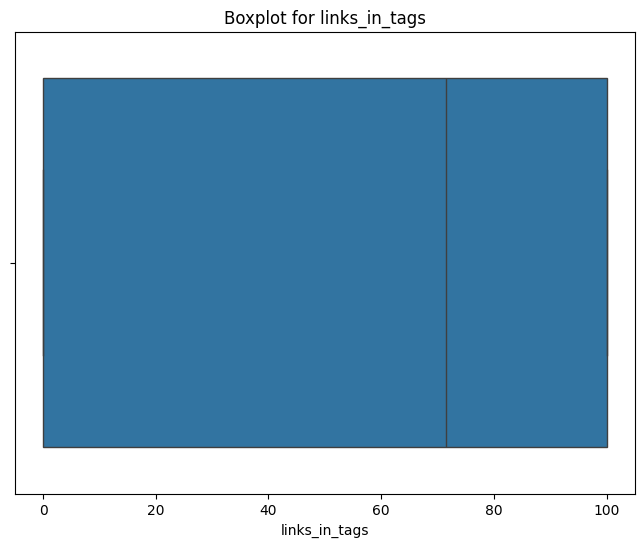

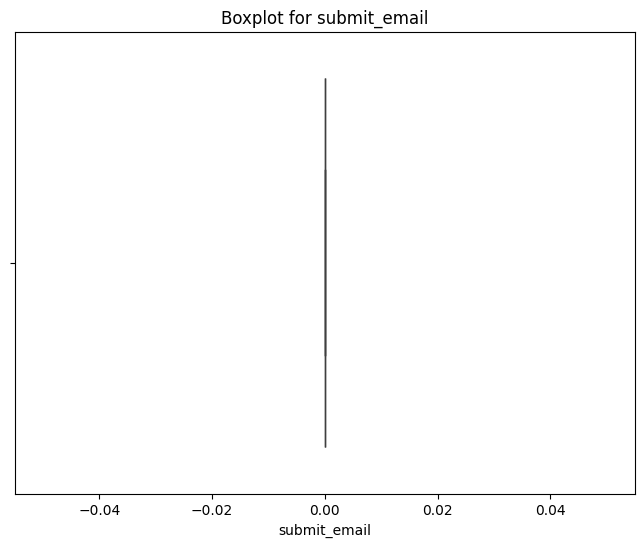

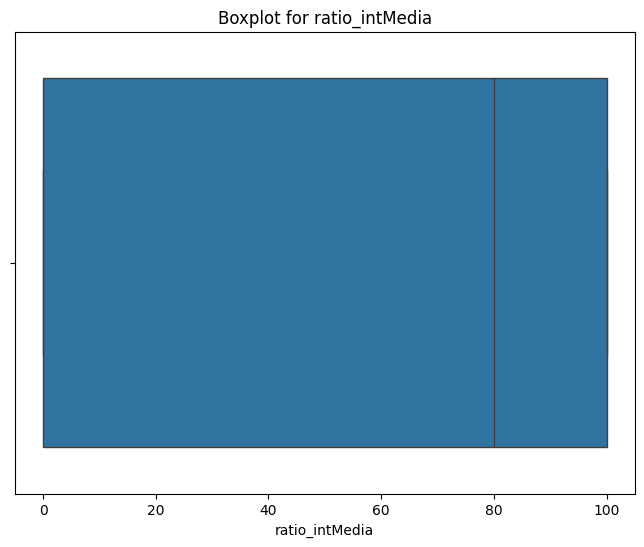

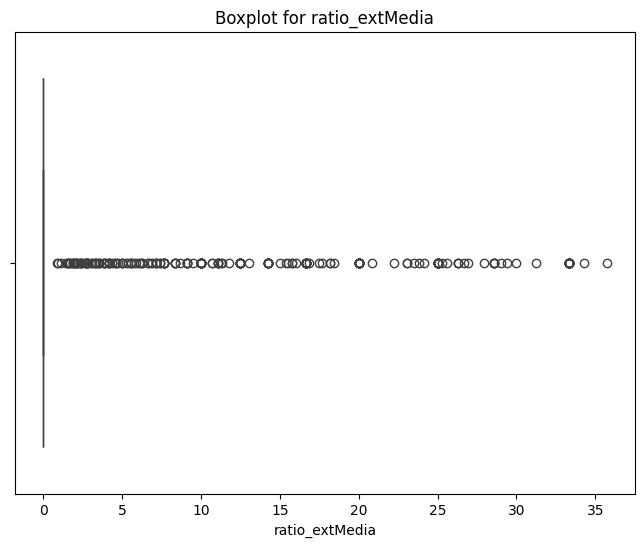

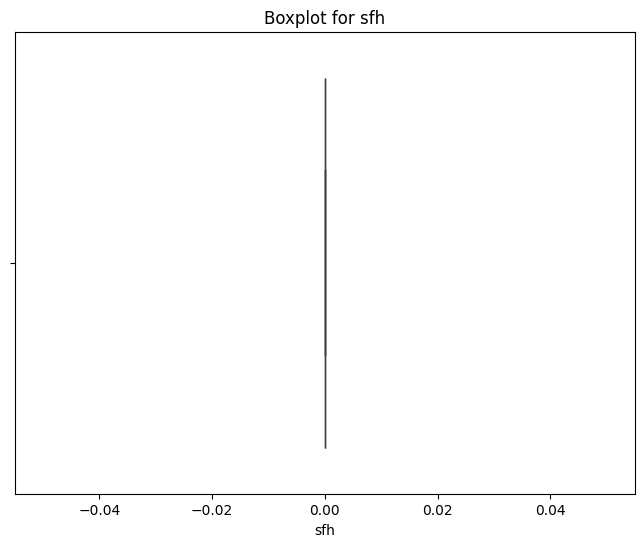

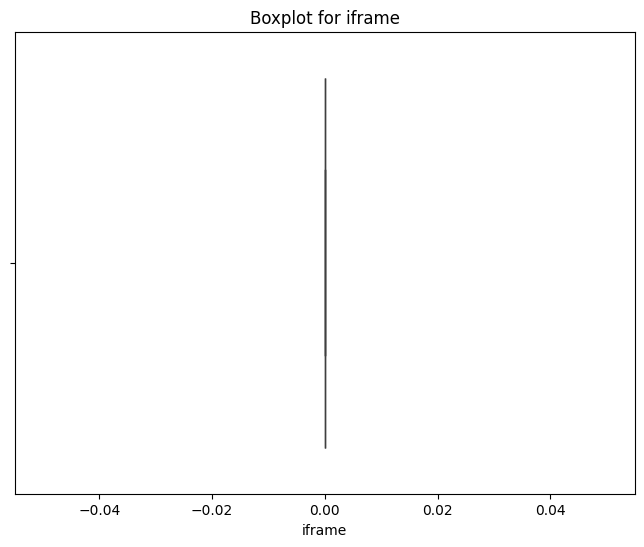

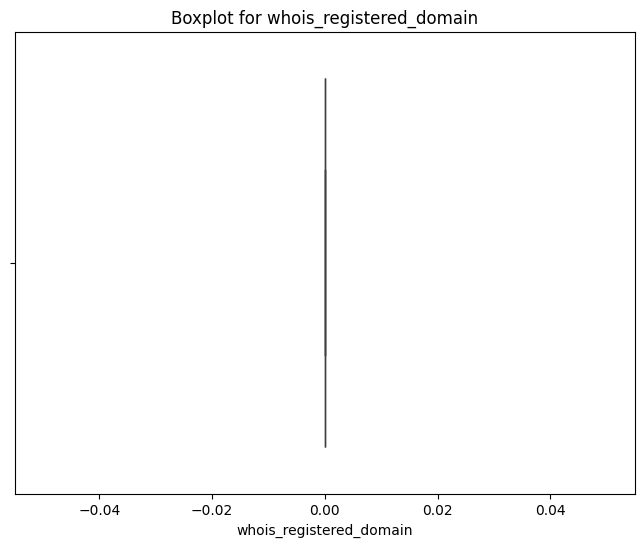

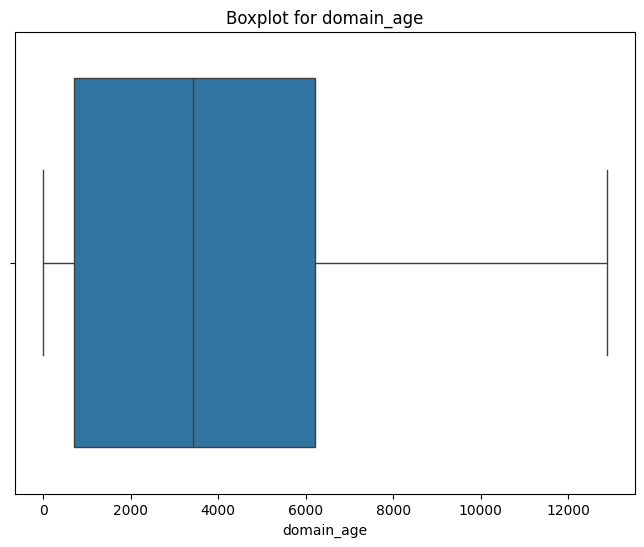

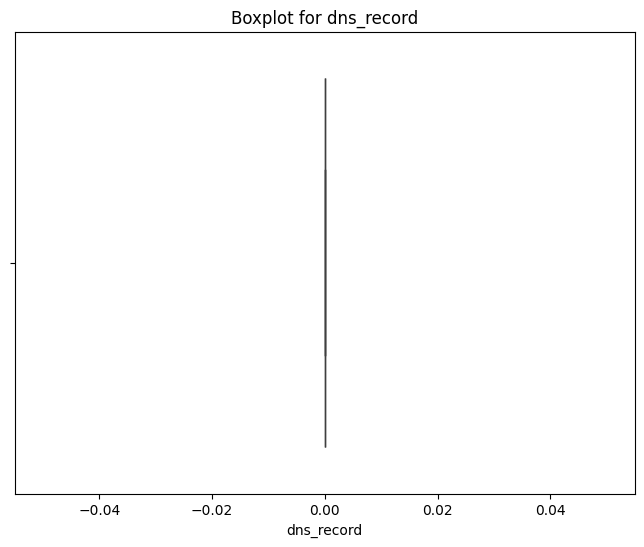

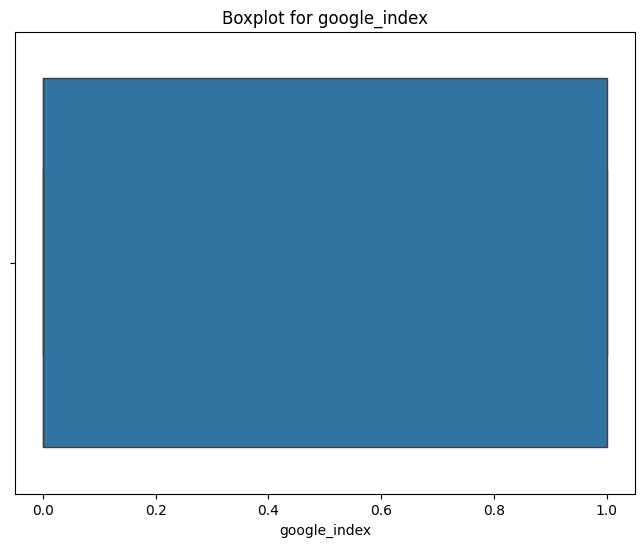

In [13]:
numerical_columns = ['length_hostname', 'ip', 'nb_www', 'nb_com', 'nb_dslash',
       'http_in_path', 'https_token', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension',  'nb_external_redirection',
        'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'ratio_intHyperlinks',
        'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'whois_registered_domain',  'domain_age',
       'dns_record', 'google_index']

for col in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
















# why we remove outlier
** Improves Model Accuracy:**
Outliers can skew the results of statistical analyses and machine learning models. By removing them, we ensure the model accurately represents the majority of the data.

**Reduces Noise:**
Outliers are extreme values that don't follow the data's pattern and can act as noise. Removing them helps highlight meaningful trends and relationships in the data.

**Prevents Bias:**
Outliers can disproportionately influence metrics like mean or regression coefficients, leading to biased conclusions. Removing them ensures fair and reliable analysis.

   











In [14]:
x=df.iloc[:,:-1].values
x

array([[ 2.200e+01,  0.000e+00,  1.000e+00, ..., -1.000e+00,  0.000e+00,
         0.000e+00],
       [ 2.300e+01,  0.000e+00,  0.000e+00, ...,  3.892e+03,  0.000e+00,
         0.000e+00],
       [ 2.700e+01,  0.000e+00,  1.000e+00, ...,  6.989e+03,  0.000e+00,
         0.000e+00],
       ...,
       [ 1.500e+01,  0.000e+00,  1.000e+00, ...,  7.266e+03,  0.000e+00,
         0.000e+00],
       [ 1.800e+01,  0.000e+00,  1.000e+00, ...,  5.596e+03,  0.000e+00,
         1.000e+00],
       [ 1.700e+01,  0.000e+00,  0.000e+00, ...,  2.778e+03,  0.000e+00,
         0.000e+00]])

In [15]:
y=df.iloc[:,-1].values
y

array([0, 1, 0, ..., 0, 1, 0])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

Train-Test Split: Prevents overfitting and ensures the model is evaluated on unseen data.

Separating X and Y: Allows the model to learn from features (X) and predict the target (y) without mixing inputs and outputs.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Fit the scaler on the training data to calculate the mean and standard deviation.

Transform the training data (x_train) to scale the features.
Transform the test data (x_test) using the same scaling parameters.
Both x_train and x_test now have features centered around 0 with unit variance.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models={
    'KNN':KNeighborsClassifier(),
    'NAIVE':GaussianNB(),
    'SVM':SVC()
}
accuracy_score={}

In [26]:

accuracy_scores = {}

# Loop through models and calculate accuracy scores
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predict using the model
    y_pred = model.predict(x_test)

    # Calculate accuracy score
    score = accuracy_score(y_test, y_pred)

    # Store the score in the dictionary
    accuracy_scores[model_name] = score * 100

    # Print the model's accuracy score
    print(f"{model_name} accuracy score is {score * 100:.2f}%")

KNN accuracy score is 88.62%
NAIVE accuracy score is 82.72%
SVM accuracy score is 90.45%


The K-Nearest Neighbors (KNN) classifier is a simple, non-parametric, and lazy machine learning algorithm used for classification and regression, where predictions are made based on the majority class (for classification) or average (for regression) of the 'k' nearest neighbors in the feature space, determined using a distance metric like Euclidean distance.

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem, assuming independence between features, and is widely used for classification tasks such as spam detection, text classification, and sentiment analysis due to its simplicity, speed, and effectiveness with small datasets.

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression, which finds the optimal hyperplane that maximizes the margin between different classes in the feature space, and is effective for high-dimensional data and when a clear margin of separation exists, using kernels to handle non-linear data.








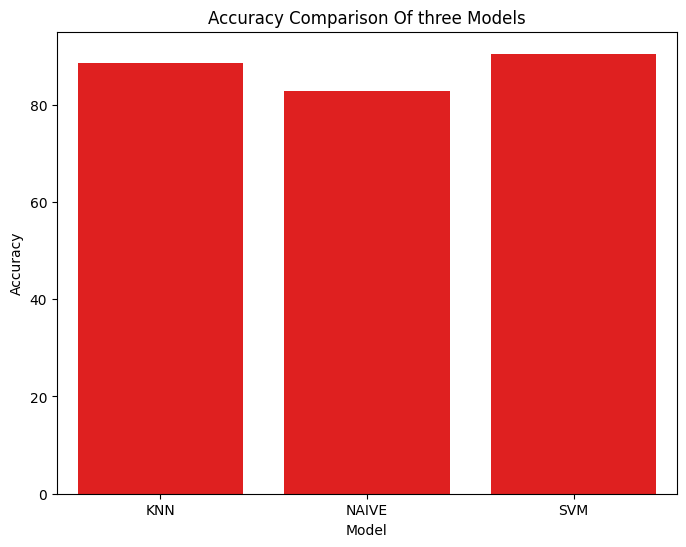

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracy_scores.keys()),y=list(accuracy_scores.values()),color='red')
plt.title("Accuracy Comparison Of three Models",color='black')
plt.xlabel("Model")
plt.ylabel('Accuracy')
plt.show()